In [2]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from os.path import join as oj

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 250

# change working directory to project root
while os.getcwd().split('/')[-1] != 'csi_pecarn':
    os.chdir('..')

import viz

np.random.seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
models_to_plot = ['cart', 'random_forest', 'saps', 'grl', 'brs', 'skope_rules', 'rulefit', 'stbl_l1', 'stbl_l2']
suffix = 'cv_mean'
metric = 'best_spec_0.96_sens'

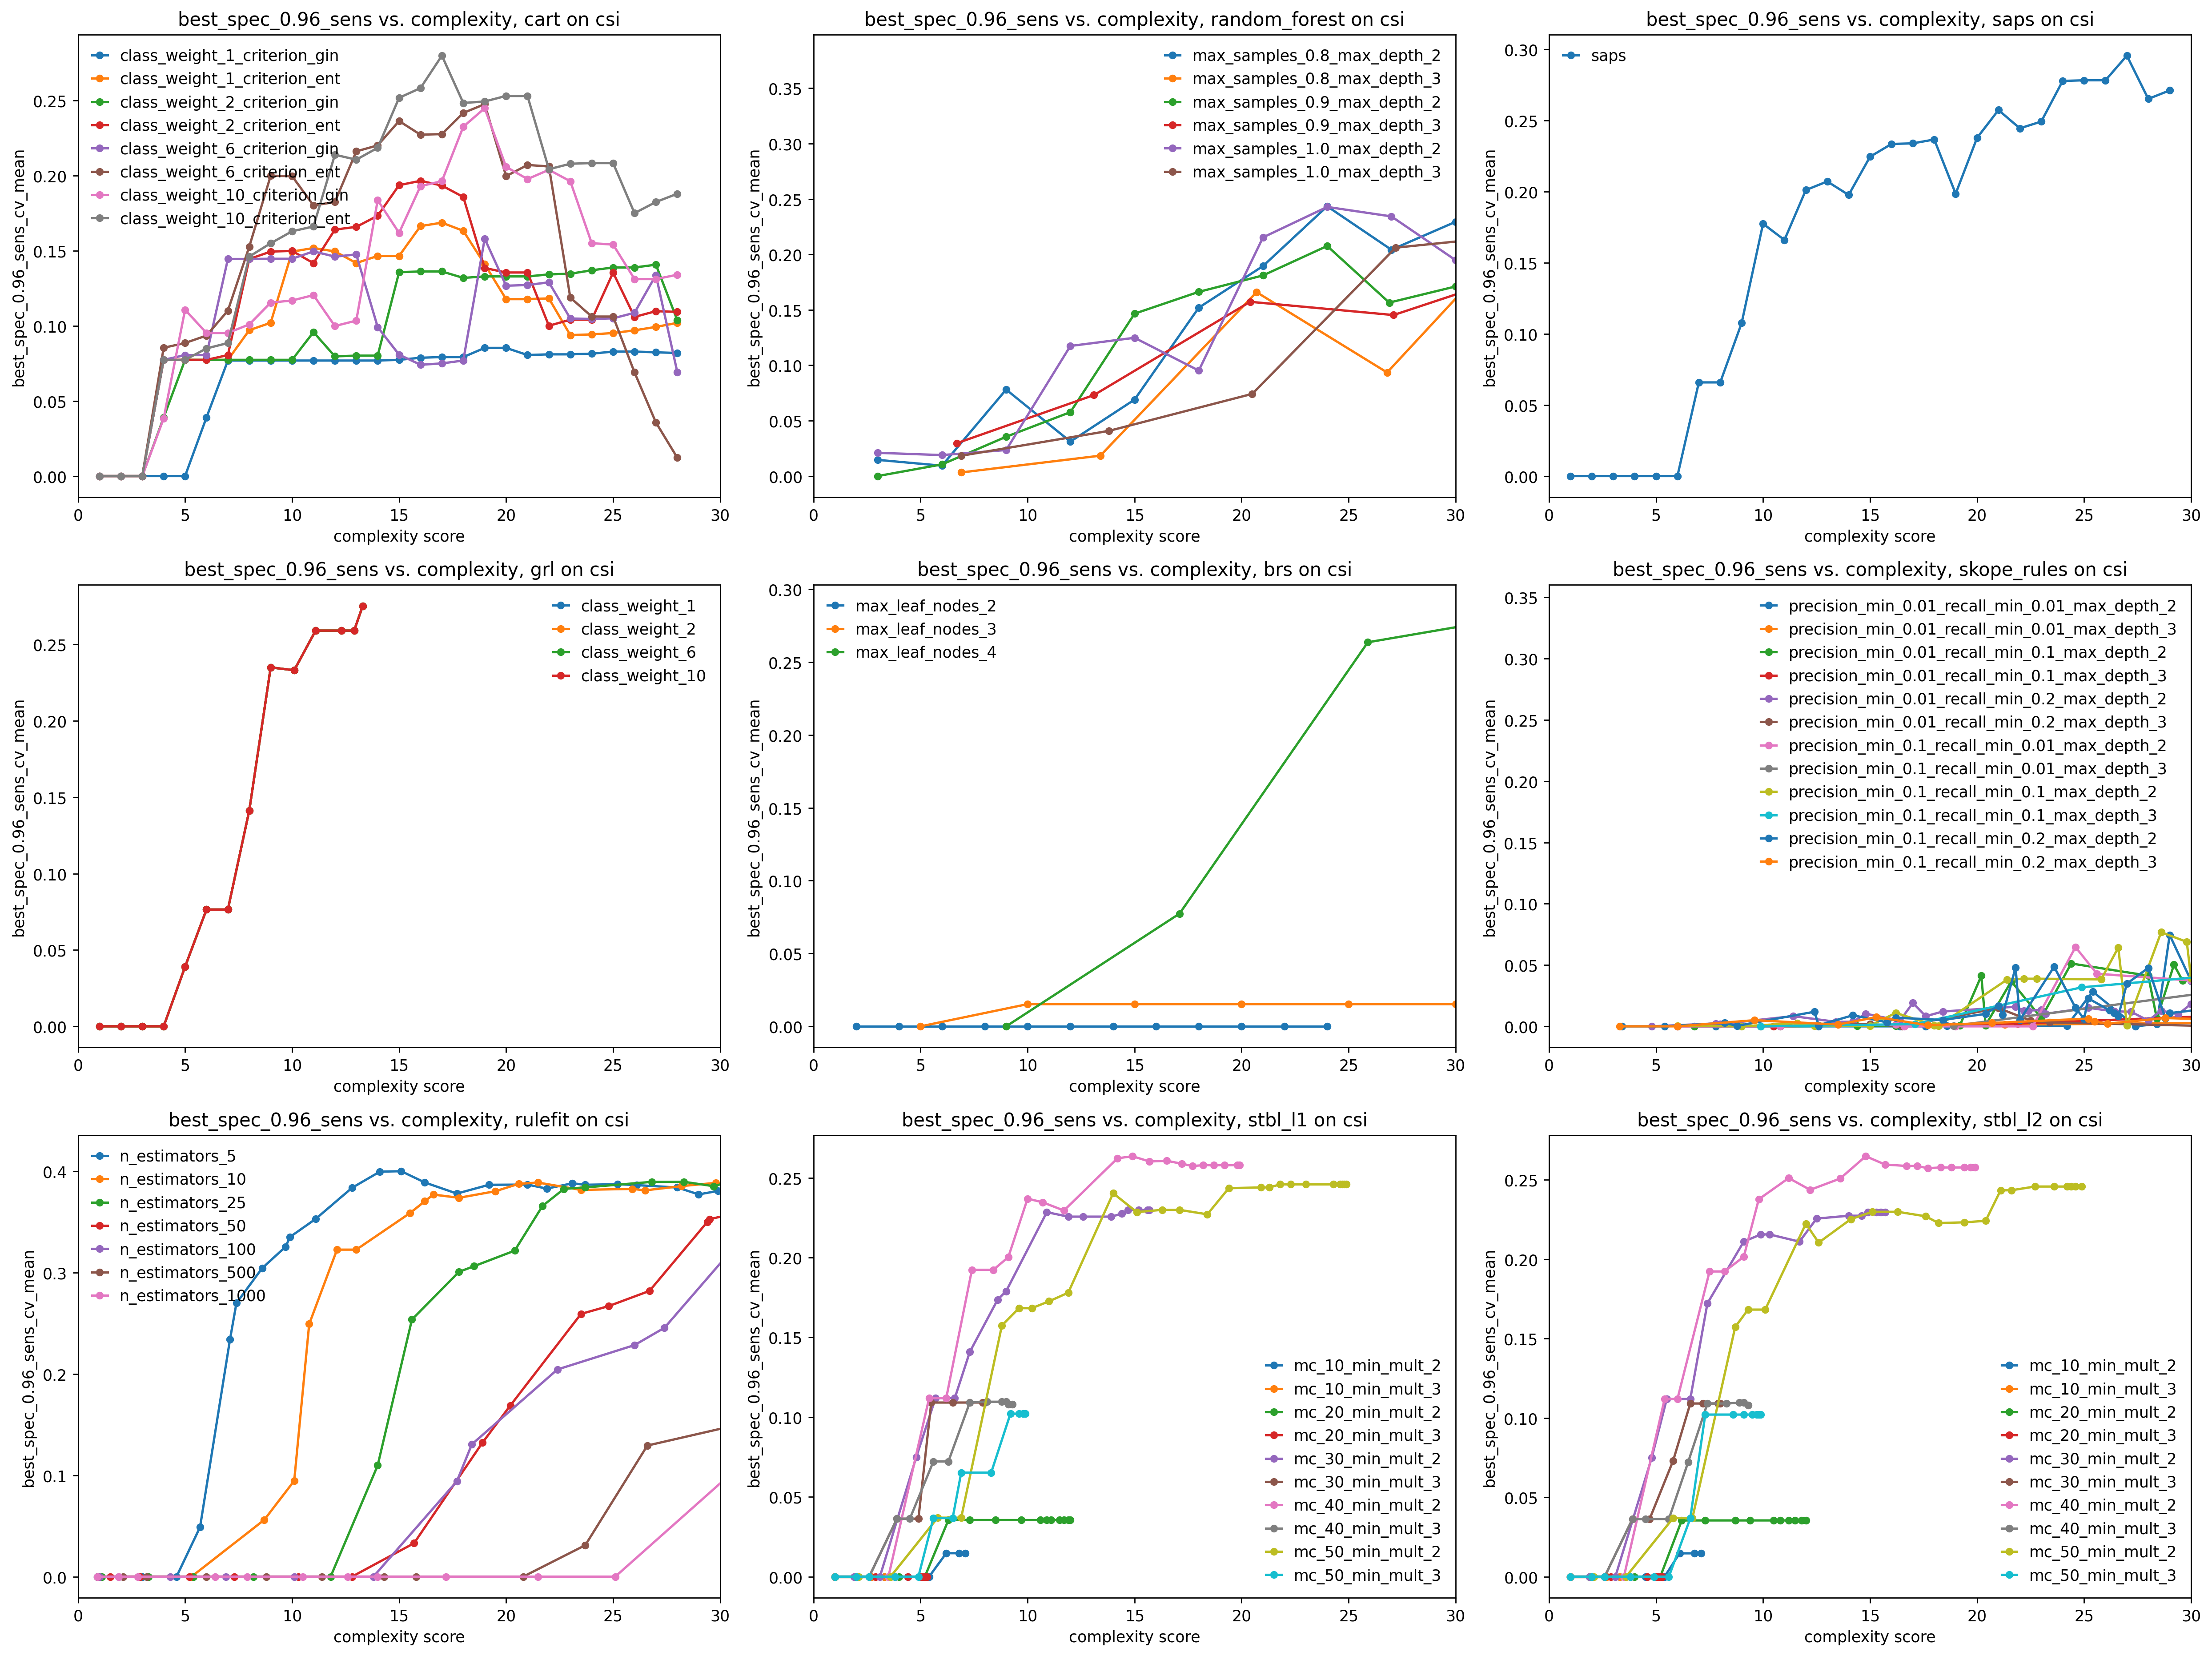

In [4]:
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15))
for i, model in enumerate(models_to_plot):
    result = pkl.load(open(f'results/{model}_comparisons.pkl', 'rb'))
    viz.viz_model_curves_validation(
        ax=axes[i // n_cols, i % n_cols], result=result, suffix=suffix, metric=metric)
plt.plot()
plt.tight_layout()

In [8]:
model_to_best = {
    'cart': 'class_weight_10_criterion_ent',
    'random_forest': 'max_samples_0.9_max_depth_2',
    'gradient_boosting': 'loss_exp_max_depth_2',
    'rulefit': 'n_estimators_5',
    'saps': 'default',
    'grl': 'class_weight_10',
    'brs': 'max_leaf_nodes_4',
    'skope_rules': 'precision_min_0.1_recall_min_0.1_max_depth_2',
    'stbl_l1': 'mc_40_min_mult_2',
    'stbl_l2': 'mc_40_min_mult_2'
}
suffix = 'test'

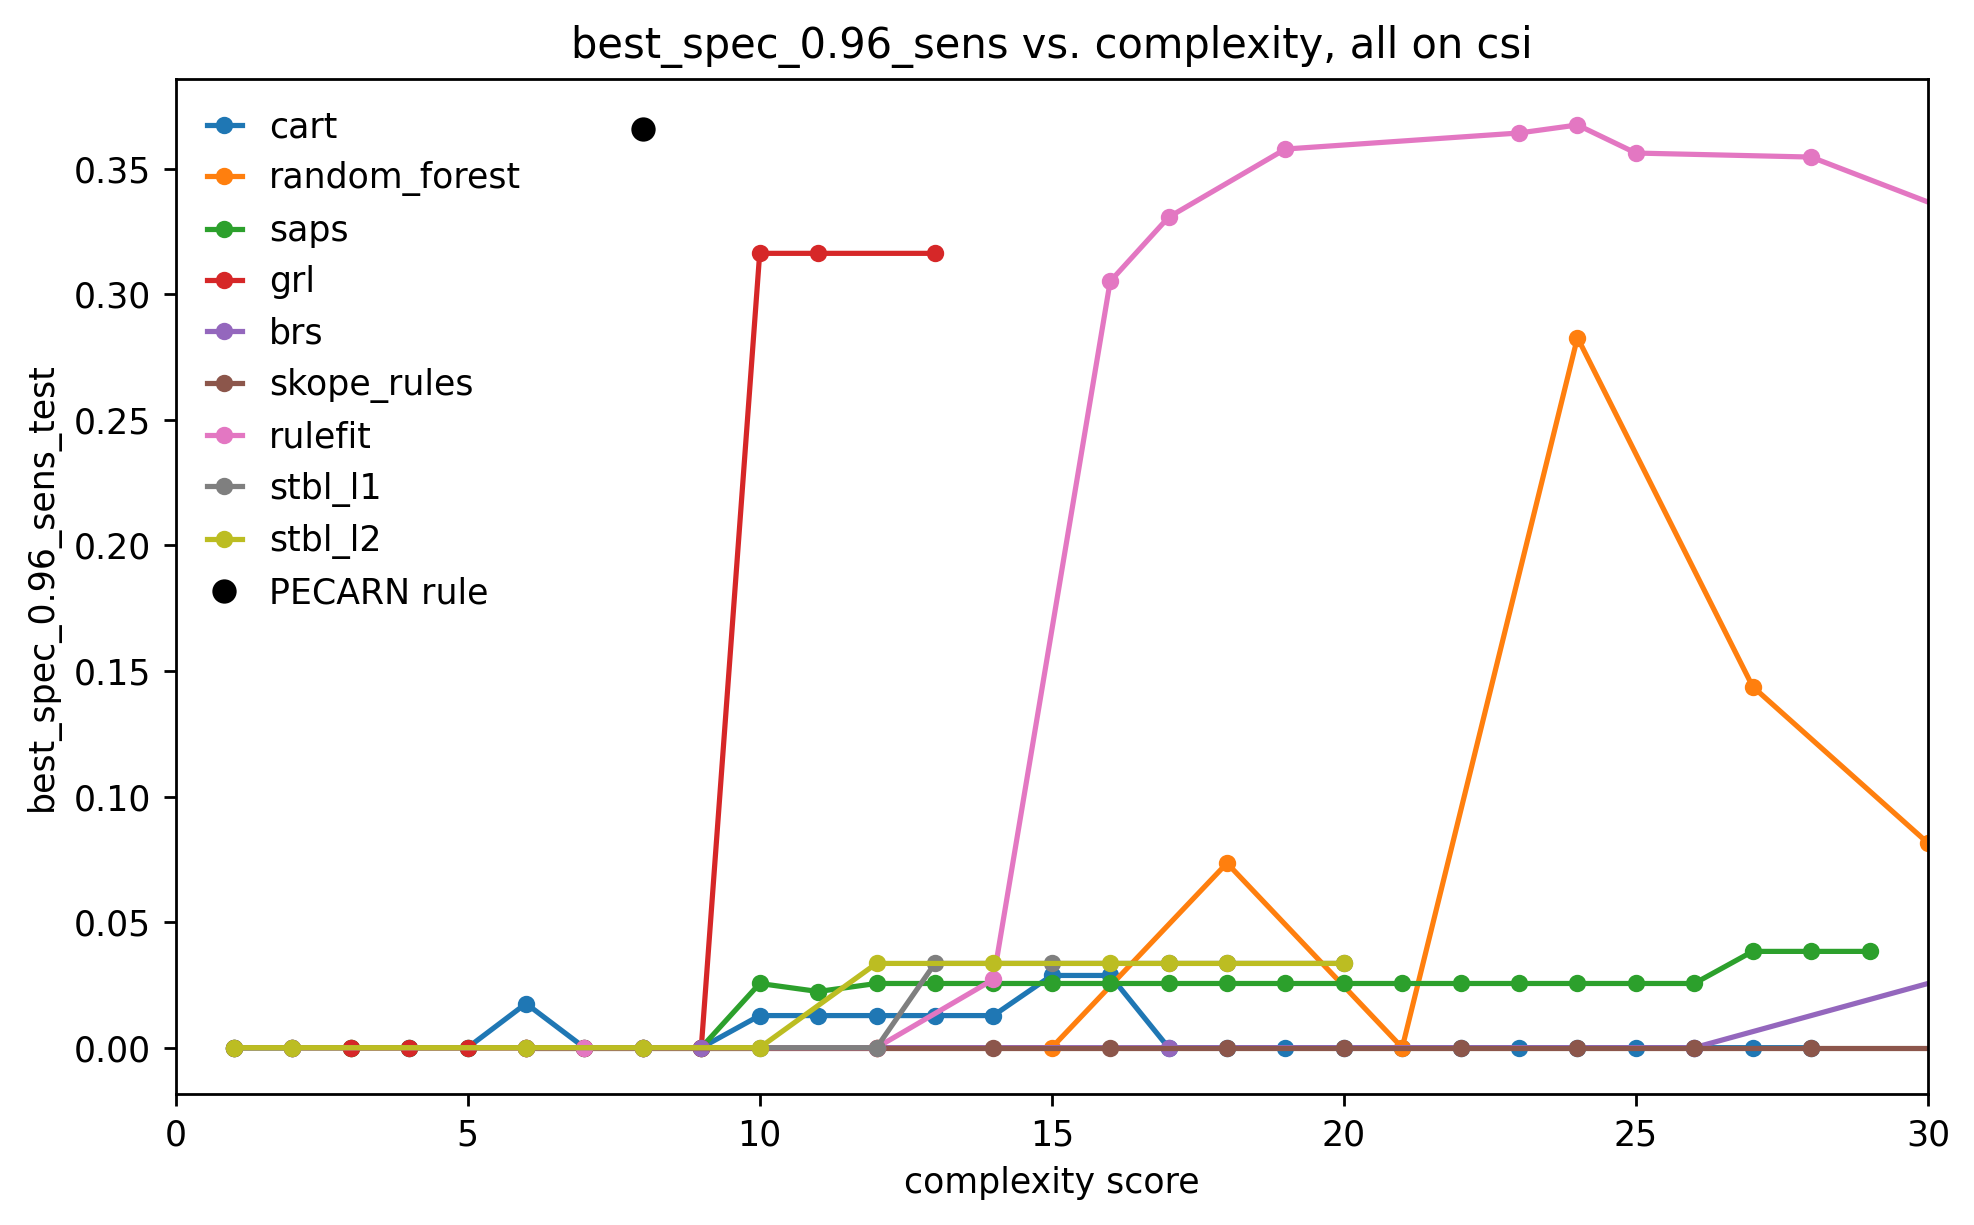

In [10]:
# n_rows, n_cols = 3, 3
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
for i, model in enumerate(models_to_plot):
    result = pkl.load(open(f'results/{model}_comparisons.pkl', 'rb'))
    viz.viz_model_curves_validation(
        ax=ax, result=result, curve_id=model_to_best[model], suffix=suffix, metric=metric)

if '0.98' in metric:
    ax.plot(8, 0, 'o', color='black', label='PECARN rule')
else:
    ax.plot(8, 0.3658, 'o', color='black', label='PECARN rule')

ax.legend(frameon=False, handlelength=1)
plt.plot()
plt.tight_layout()

In [14]:
def print_best_params_for_model(model_name: str):
    fname = oj('results', f'{model_name}_comparisons.pkl')
    df = pkl.load(open(fname, 'rb'))['df']
    best_idx = df[df['complexity_train'] < 25]['best_spec_0.96_sens_test'].argmax()
    print(df.columns[0], df.iloc[best_idx, 0])
    if 'other_kwargs' in df.columns:
        print(df.iloc[best_idx]['other_kwargs'])

In [15]:
print_best_params_for_model('rulefit')

max_rules 13
{'n_estimators': 50, 'cv': False, 'random_state': 0, 'include_linear': True}


In [16]:
print_best_params_for_model('cart')

max_leaf_nodes 22
{'class_weight': {0: 1, 1: 10}, 'criterion': 'gini'}


In [17]:
print_best_params_for_model('random_forest')

n_estimators 6
{'max_samples': 0.8, 'max_depth': 3}


In [18]:
print_best_params_for_model('grl')

max_depth 10
{'class_weight': {0: 1, 1: 1}, 'criterion': 'neg_corr'}


In [19]:
print_best_params_for_model('saps')

max_rules 10
